In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


In [21]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment'>

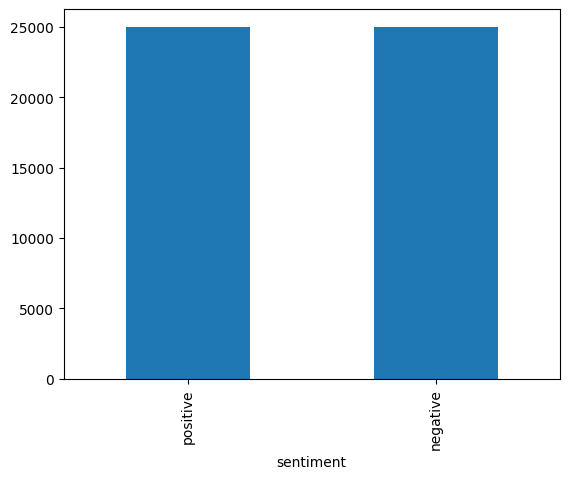

In [22]:
df["sentiment"].value_counts().plot(kind="bar")

In [23]:
pos_senti=df[df["sentiment"]=="positive"]
neg_senti=df[df["sentiment"]=="negative"]

In [32]:
pos_senti=list(df[df["sentiment"]=="positive"]["review"])
neg_senti=list(df[df["sentiment"]=="negative"]["review"])

In [25]:
nltk.download("stopwords")
stop_word= set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def create_cloud(string, title =None):
    cloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    max_words=100,
        stopwords = stop_word
    ).generate(string)

    # 3. Plot the WordCloud image
    plt.figure(figsize=(10, 5)) # Set figure size
    plt.imshow(cloud, interpolation='bilinear') # Display the image smoothly
    plt.axis("off") # Hide axes
    if title:
        plt.title(title, fontdict={"fontsize": 15})
    plt.show()

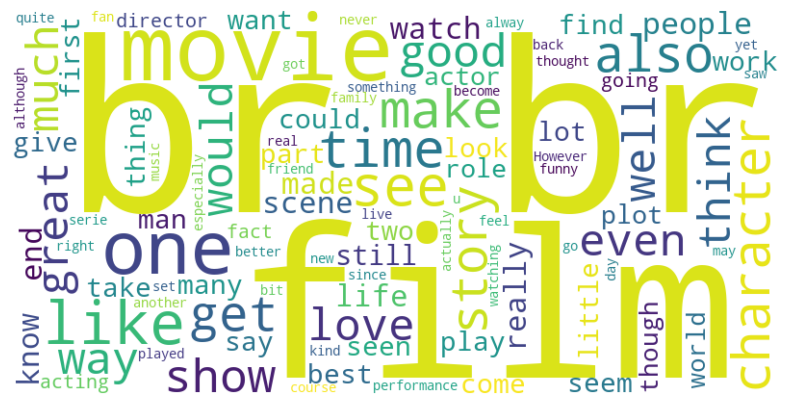

In [ ]:
create_cloud(" ".join(pos_senti))

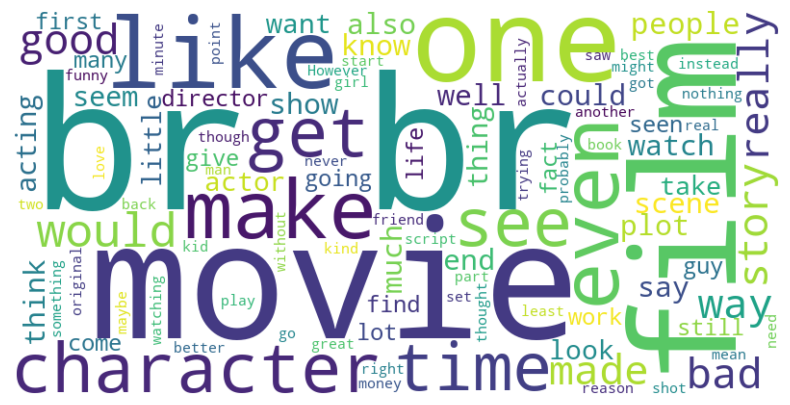

In [33]:
create_cloud(" ".join(neg_senti))

In [45]:
import re
from nltk.stem import PorterStemmer

def text_preprocessing(review):
    sen = re.sub(r'<br\s*/?>', '', review)
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can't", "can not", sen)
    sen = re.sub(r'\d+', '', sen)
    sen = re.sub(r'<[^>]+>', '', sen)
    sen = re.sub(r'[^\w\s]', '', sen)


    lower_sen = sen.lower()
    rem_stop = " ".join(word for word in lower_sen.split() if word not in stop_word)
    porter = PorterStemmer()# lemmatizer
    stemmed = " ".join(porter.stem(word) for word in rem_stop.split())

    return stemmed

In [46]:
df["clean_text"]= df["review"].apply(text_preprocessing)

In [47]:
df.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [54]:
tf= TfidfVectorizer(max_features=10000)
gbn= GaussianNB()

In [55]:
encode=tf.fit_transform(df["clean_text"])
encode.shape

(50000, 10000)

In [56]:
data = encode.toarray()
data.shape

(50000, 10000)

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(data,df["sentiment"], test_size=.2)

In [58]:
model=gbn.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.816425

In [59]:
pred = model.predict(xtest)

In [60]:
cm= confusion_matrix(ytest,pred)
cm

array([[4100,  915],
       [1503, 3482]])

In [62]:
ytest.value_counts()

sentiment
negative    5015
positive    4985
Name: count, dtype: int64

In [63]:
df["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [64]:
text=["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."]

In [65]:
data = pd.DataFrame(text, columns=["text"])

In [66]:
clean_text= data["text"].apply(text_preprocessing)

In [68]:
vec_data = tf.transform(clean_text)

In [70]:
data= vec_data.toarray()

In [71]:
model.predict(data)

array(['negative'], dtype='<U8')